
# Coronavirus Dashboard
__________________________________________
A.K.A playing with data until I'm
good enough to do something useful
(Volume 3)

By Dilan Moore
17/03/2020
__________________________________________

So this is an interesting one. Yesterday I
watched BoJo's press briefing, which was:

- All non-essential travel in London banned
- Don't go spoons for foreseeable future
- London is ahead of the curve

This begged the following questions:

- Why aren't schools closed?
- What is this curve?
- At what point on the curve do schools 
  close?
- What cool stuff can I do with the curve
- This is literally a generation defining
  statistical problem so this could be sick
  
So yeah. Let's go.

    By Dilan Moore
    
N.B - Small update, my beautiful second-hand mac, after nine years of abuse finally gave up. The evening I started this project.

Since then schools have also closed. I am re-opening the project on my new machine, date 22/03/2020.
__________________________________________

### Step 1 - Gentle Research

So, I've started by watching lectures/videos
on the application of statistics in disease
prevention.

For the practicalities:
https://www.youtube.com/watch?v=MwDh3IEXYcU

For the maths:
https://www.youtube.com/watch?v=Kas0tIxDvrg

I also need some live, updating coronavirus data for my graphs. Found below

Government data:
    https://www.gov.uk/government/publications/covid-19-track-coronavirus-cases
    
Daily Indicators
    https://www.arcgis.com/sharing/rest/content/items/bc8ee90225644ef7a6f4dd1b13ea1d67/data
    
Daily Confirmed Cases
    https://www.arcgis.com/sharing/rest/content/items/e5fd11150d274bebaaf8fe2a7a2bda11/data

### Step 2 - Initial Exploration

Now to explore and clean the available data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# I much prefer seaborn but have pyplot just in case
import seaborn as sns
import numpy as np

In [2]:
indicExcel = "https://www.arcgis.com/sharing/rest/content/items/bc8ee90225644ef7a6f4dd1b13ea1d67/data"
indicators = pd.read_excel(indicExcel)

indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateVal        1 non-null      datetime64[ns]
 1   TotalUKCases   1 non-null      int64         
 2   NewUKCases     1 non-null      int64         
 3   TotalUKDeaths  1 non-null      int64         
 4   EnglandCases   1 non-null      int64         
 5   ScotlandCases  1 non-null      int64         
 6   WalesCases     1 non-null      int64         
 7   NICases        1 non-null      int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 192.0 bytes


In [3]:
dailyExcel = "https://www.arcgis.com/sharing/rest/content/items/e5fd11150d274bebaaf8fe2a7a2bda11/data"
dailyCases = pd.read_excel(dailyExcel)

dailyCases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateVal       52 non-null     datetime64[ns]
 1   CMODateCount  52 non-null     int64         
 2   CumCases      52 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.3 KB


In [4]:
# So our daily cases look ok, and if they really do go back 51 days that is a good outcome.
# However our indicators looks a bit bare.

indicators.head()

,DateVal,TotalUKCases,NewUKCases,TotalUKDeaths,EnglandCases,ScotlandCases,WalesCases,NICases
0,2020-03-22,5683,665,281,4792,416,347,128


In [5]:
dailyCases.head()

,DateVal,CMODateCount,CumCases
0,2020-01-31,2,2
1,2020-02-01,0,2
2,2020-02-02,0,2
3,2020-02-03,0,2
4,2020-02-04,0,2


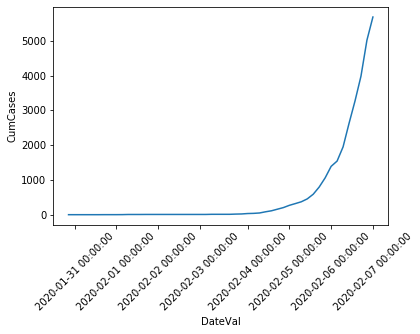

In [6]:
# So indicators have been tracked since yesterday, so I can only hope that they will continue to do so.
# Dailycases looks absoloutely mint though. Time to plot.
# Also because I'm a big boy now I've decided to actually use functions

def lineplot(x, y):
    plot = sns.lineplot(x , y)
    plot.set_xticklabels(x ,rotation = 45)
    return;

lineplot (dailyCases.DateVal, dailyCases.CumCases)

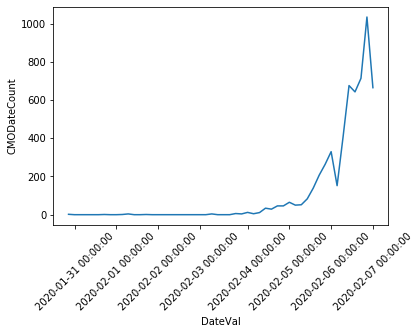

In [7]:
lineplot (dailyCases.DateVal, dailyCases.CMODateCount)

### Step 3 - Fitting Models

So the data is clean, and looks pretty tasty. We've mapped it, but with a live challenge like this
I want to do something useful. Regression time.

In [8]:
# Again, these should update as Coronavirus spreads. But in the 3Brown 1Blue video they mentioned the R value and its importance.
# Can we find it? Quick research says I need  new library for polynomial regression

import sklearn as sk
from sklearn.preprocessing import PolynomialFeatures
import time
poly2 = PolynomialFeatures(degree = 2)

#apparently sklearn only likes arrays, not pandas

cumulative = dailyCases[['CumCases']].to_numpy()

Xgraph = poly2.fit(cumulative)

plt.scatter(dailyCases.DateVal, dailyCases.CumCases)
plt.plot(Xgraph.fit_transform(cumulative))

ValueError: view limit minimum -36876.93664874552 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [9]:
# Okay, looks like it doesn't like dates. Will convert to n, where n is days since record began

nList = []
for x in dailyCases.index:
    nList.append(x)
    
dailyCases['n'] = nList
dailyCases.head()

,DateVal,CMODateCount,CumCases,n
0,2020-01-31,2,2,0
1,2020-02-01,0,2,1
2,2020-02-02,0,2,2
3,2020-02-03,0,2,3
4,2020-02-04,0,2,4


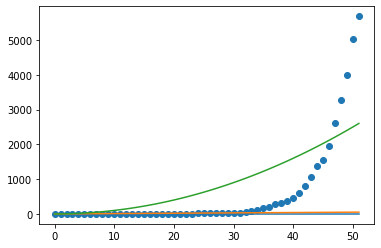

In [10]:
# Much better. Now we can plot this boi

cumulative = dailyCases[['n']].to_numpy()

Xgraph = poly2.fit(cumulative)

plt.scatter(dailyCases.n, dailyCases.CumCases)
plt.plot(Xgraph.fit_transform(cumulative))

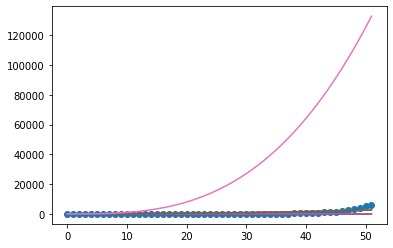

In [11]:
# So this graph is ok, but it isn't really steep enough. Wil try different power.

poly3 = PolynomialFeatures(degree = 3)

Xgraph3 = poly3.fit(cumulative)
Xgraph2 = poly2.fit(cumulative)

plt.scatter(dailyCases.n, dailyCases.CumCases)
plt.plot(Xgraph2.fit_transform(cumulative))
plt.plot(Xgraph3.fit_transform(cumulative))



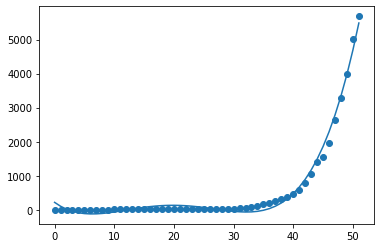

In [12]:
#Well this is annoying. I can't seem to get a nice fit. 
#Although I don't fully understand why his does it, I will try the linear regression in combination

from sklearn.linear_model import LinearRegression
linear = LinearRegression()

linear.fit(cumulative, dailyCases.CumCases.to_numpy())

poly4 = PolynomialFeatures(degree = 4)
Xgraph4 = poly4.fit_transform(cumulative)
poly4.fit(Xgraph4, dailyCases.CumCases.to_numpy())

linear2 = LinearRegression()
linear2.fit(Xgraph4, dailyCases.CumCases.to_numpy())

plt.scatter(dailyCases.n, dailyCases.CumCases)
plt.plot(dailyCases.n, linear2.predict(poly4.fit_transform(cumulative)))

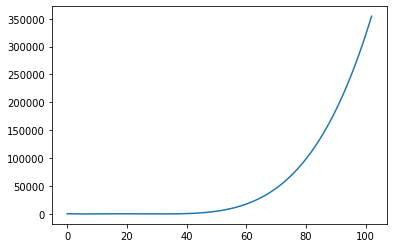

In [13]:
# I am actually a God among men. This is sick. Like actually sick.
# This is both the messiest and the cooliest I think I've ever done.
# But does it predict?

extraValues = cumulative+cumulative.max()
predictive = np.vstack((cumulative, extraValues))

plt.plot(predictive, linear2.predict(poly4.fit_transform(predictive)))

In [14]:
# Well this is very cool. 100 day forecast achieved. 
# Tabulated for ease of viewing

# (n.b, tabulation took 20 mins as predictive is 2d. A N G E R Y.)

x = predictive.ravel()
y = linear2.predict(poly4.fit_transform(predictive))

print(x)
print(y)
d = np.vstack((x, y))
df = pd.DataFrame(data = d)
print (df)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102]
[ 2.17533481e+02  1.03725104e+02  1.72244226e+01 -4.54163575e+01
 -8.74527350e+01 -1.11947914e+02 -1.21772802e+02 -1.19606014e+02
 -1.07933868e+02 -8.90503885e+01 -6.50573031e+01 -3.78640457e+01
 -9.18775499e+00  1.94467256e+01  4.67068474e+01  7.14523571e+01
  9.27352960e+01  1.09800001e+02  1.22083103e+02  1.29213530e+02
  1.31012502e+02  1.27493536e+02  1.18862445e+02  1.05517334e+02
  8.80486060e+01  6.72389569e+01  4.40633789e+01  1.96891587e+01
 -4.52412193e+00 -2.70245861e+01 -4.60680618e+01 -5.97180824e+01
 -6.58458857e+01 -6.21304150e+01 -4.60583181e+01 -1.49239

In [15]:
dailyCases.tail()

,DateVal,CMODateCount,CumCases,n
47,2020-03-18,676,2626,47
48,2020-03-19,643,3269,48
49,2020-03-20,714,3983,49
50,2020-03-21,1035,5018,50
51,2020-03-22,665,5683,51


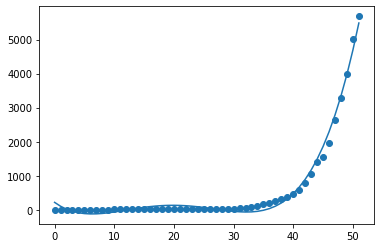

In [21]:
# As this is ultimately a predictive model that will change over time, why not save each
# output to track how the situation changes

from datetime import date as dt
import openpyxl
 
Current_Date = dt.today().strftime("%d-%b-%Y")

writer = pd.ExcelWriter(Current_Date + '_Model.xlsx')
df.to_excel(writer, 'model', 'UTF-8')
writer.save()

# Had to segregate so they plotted on different axis

plt.scatter(dailyCases.n, dailyCases.CumCases)
plt.plot(dailyCases.n, linear2.predict(poly4.fit_transform(cumulative)))
plt.figsize=(40, 10)
plt.savefig(Current_Date + '_Model_Grap')




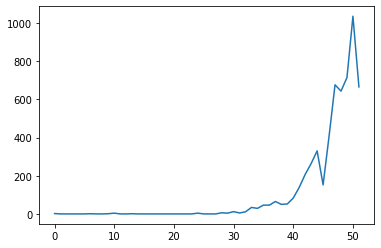

In [17]:

plt.plot(dailyCases.n, dailyCases.CMODateCount)
plt.figsize=(40, 10)
plt.savefig(Current_Date + '_Daily_Change')

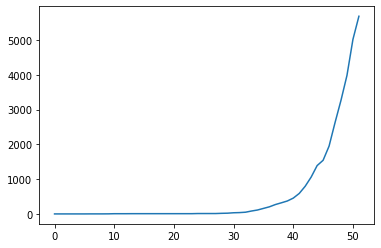

In [18]:

plt.plot (dailyCases.n, dailyCases.CumCases)
plt.figsize=(40, 10)
plt.savefig(Current_Date + '_Daily_Cases')

### Step 4 - Logistical Curve

So we have now reached bedtime. Sum time for the project thus far ~3 hours. Progress is slow, but we are getting there. Logistical curve should be done by tomorrow. Then we're really motoring.